In [12]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import random
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# ROCK, PAPER, SCISSORS respectively
ROCK, PAPER, SCISSORS = 0,1,2
NUM_ACTIONS = 3

def value(p1, p2):
    if p1==p2:
        return 0
    elif (p1-1) % NUM_ACTIONS == p2:
        return 1
    else:
        return -1

In [96]:
def normalise(strategy):
    strategy = strategy.copy()
    normalisingSum = np.sum(strategy)
    if normalisingSum > 0:
        strategy /= normalisingSum
    else:
        strategy = np.ones(NUM_ACTIONS)/NUM_ACTIONS
    return strategy

def getStrategy(regretSum):
    return normalise(np.maximum(regretSum, 0))

# Use regret-matching by randomly* selecting an action. *proportional to our positive regrets.
def getAction(strategy):
    strategy /= np.sum(strategy) #normalise
    return np.searchsorted(np.cumsum(strategy), random.random())

In [131]:
def innertrain(regretSum, strategySum, oppStrategy):
    # accumulate the current strategy based on regret
    strategy = getStrategy(regretSum)
    strategySum += strategy
    
    # regret-matching: choose action based on strategy
    myAction = getAction(strategy)
    oppAction = getAction(oppStrategy)
    
    actionUtility = np.zeros(NUM_ACTIONS)
    actionUtility[oppAction] = 0
    actionUtility[(oppAction + 1) % NUM_ACTIONS] = 1
    actionUtility[(oppAction - 1) % NUM_ACTIONS] = -1

    regretSum += actionUtility - actionUtility[myAction]
    
    return regretSum, strategySum

def train(iterations):
    regretSum = np.zeros(NUM_ACTIONS)
    strategySum = np.zeros(NUM_ACTIONS)
    oppStrategy = np.array([0.4,0.3,0.3])
    
    for i in range(iterations):
        regretSum, strategySum = innertrain(regretSum, strategySum, oppStrategy)
        
    return strategySum

def train2p(oiterations, iterations):
    strategySumP1 = np.zeros(NUM_ACTIONS)
    strategySumP2 = np.zeros(NUM_ACTIONS)
        
    for j in range(oiterations):
        regretSumP1 = np.zeros(NUM_ACTIONS)
        regretSumP2 = np.zeros(NUM_ACTIONS)
        
        oppStrategy = normalise(strategySumP2)
        for i in range(iterations):    
            regretSumP1, strategySumP1 = innertrain(regretSumP1, strategySumP1, oppStrategy)
            
        oppStrategy = normalise(strategySumP1)
        for i in range(iterations):
            regretSumP2, strategySumP2 = innertrain(regretSumP2, strategySumP2, oppStrategy)
        
        print(normalise(strategySumP1), normalise(strategySumP2))
        
    return strategySumP1, strategySumP2

s1, s2 = train2p(10, 1000)
normalise(s1), normalise(s2)

[0.74337465 0.05010807 0.20651728] [0.00066667 0.99866667 0.00066667]
[0.37185399 0.0252207  0.6029253 ] [0.49966667 0.49966667 0.00066667]
[0.24801377 0.34909158 0.40289465] [0.33541323 0.33344444 0.33114233]
[0.19251033 0.37533489 0.43215477] [0.25437867 0.25529167 0.49032966]
[0.35067493 0.30193458 0.34739049] [0.37430621 0.21436648 0.41132731]
[0.4483916  0.25179456 0.29981384] [0.31203295 0.34513873 0.34282832]
[0.48872473 0.21792375 0.29335152] [0.26888538 0.43716653 0.29394808]
[0.42792997 0.1909871  0.38108293] [0.35681906 0.3859347  0.25724624]
[0.38140072 0.2695403  0.34905898] [0.35521939 0.41570988 0.22907073]
[0.34482731 0.32011567 0.33505701] [0.36065424 0.41476861 0.22457715]


(array([0.34482731, 0.32011567, 0.33505701]),
 array([0.36065424, 0.41476861, 0.22457715]))

[30, 18, 18, 6, 21, 15, 9, 15, 21, 11] [11, 21, 27, 11, 19, 30, 13, 24, 11, 7]


([<matplotlib.lines.Line2D at 0x11d22c240>], 14.84, 14.5)

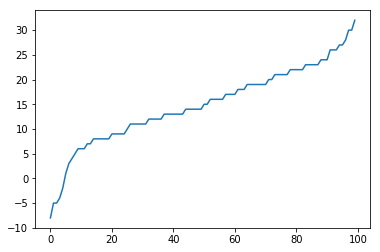

In [127]:
# 2 Player CFR Results
s1, s2 = train2p(100, 300)
strategy, oppStrategy = normalise(s1), normalise(s2)
vvv = []
for i in range(100):
    vv = 0
    for x in range(100):
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        vv += value(myAction, otherAction)
    vvv.append(vv)
print(vvv[:10], vvv[90:])
plot(sorted(vvv)), np.mean(vvv), np.median(vvv)
#plt.hist(vvv, bins=5), np.mean(vvv)

[6, 6, 19, -4, -3, -10, 5, 12, 12, 18] [12, 14, 23, -5, 3, 9, 0, 6, 9, 10]


([<matplotlib.lines.Line2D at 0x11afa4c18>], 7.92, 9.0)

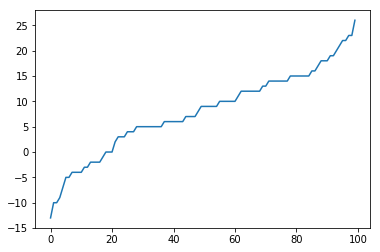

In [83]:
# 1 Player CFR Results
stratSum = train(1000)
strategy = normalise(stratSum)
oppStrategy = np.array([0.4, 0.3, 0.3])

vvv = []
for i in range(100):
    vv = 0
    for x in range(100):
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        vv += value(myAction, otherAction)
    vvv.append(vv)
print(vvv[:10], vvv[90:])
plot(sorted(vvv)), np.mean(vvv), np.median(vvv)